### how to handle categorical missing values
##### frequent category imputation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('house price prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [4]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [5]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

### compute the frequency with every feature

In [6]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

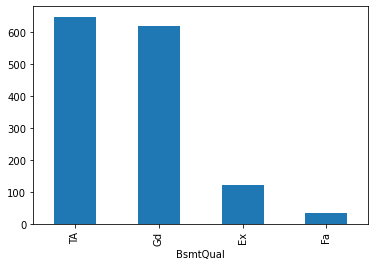

In [7]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

#### another method to know how many feature present in specific columns

In [8]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [9]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [10]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
df['GarageType'].value_counts().index[0]

'Attchd'

### Another method for imputing is done by mode 

In [12]:
df['GarageType'].mode()[0]

'Attchd'

In [13]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]  ### we also replace value count.index by mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [14]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)


In [15]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### addind a variable to caputure the NaN

In [16]:
df=pd.read_csv('house price prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [17]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [19]:
frequents=df['BsmtQual'].mode()[0]

In [20]:
df['BsmtQual'].fillna(frequents,inplace=True)

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [22]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequentss=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequentss,inplace=True)

In [23]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### suppose you have more frequent categories , we just replace NaN with a new category 

In [6]:
import pandas as pd
import numpy as np
df=pd.read_csv('house price prediction.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [8]:
def impute_nan(df,variable):
    df[variable+'newvar']=np.where(df[variable].isnull(),'missing',df[variable])

In [9]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [12]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,GarageTypenewvar,FireplaceQunewvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [15]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,GarageTypenewvar,FireplaceQunewvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA
